# COVID mortality rates per country

This is a naive analysis of the published  mortality rates for the COVID 19 pandemic.

- pull the data from a csv on github
- turn it into a Pandas DataFrame
- do some filtering and a couple of plots

I believe that **everyone** should be able to do this.
Doing basic data analysis should be  like  what reading and writing
was at the beginning of the 20th century - a basic skill 
taught to every child at school.

The data is published [here](https://github.com/CSSEGISandData/COVID-19)

**2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE**

This is the data repository for the 2019 Novel Coronavirus Visual Dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE). 




In [1]:
import requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Get the latest time series and save to disk

In [234]:
root_dir = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'
fn = 'time_series_covid19_%s_global.csv'

for ss in ['deaths','confirmed']:
    r = requests.get(root_dir + fn%ss, allow_redirects=True)
    open('covid_%s.csv'%ss, 'wb').write(r.content)



# Parse them to a DataFrames

In [235]:
df = pd.read_csv('covid_deaths.csv')
dfc = pd.read_csv('covid_confirmed.csv')

In [186]:
dfc[140:145]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20
140,NaN,Jordan,31.2400,36.5100,0,0,0,0,0,0,...,154,172,212,235,246,259,268,274,278,299
141,NaN,Kazakhstan,48.0196,66.9237,0,0,0,0,0,0,...,72,81,111,150,228,284,302,343,380,435
142,NaN,Kenya,-0.0236,37.9062,0,0,0,0,0,0,...,25,28,31,31,38,42,50,59,81,110
143,NaN,"Korea, South",36.0000,128.0000,1,1,2,2,3,4,...,9037,9137,9241,9332,9478,9583,9661,9786,9887,9976
144,NaN,Kuwait,29.5000,47.7500,0,0,0,0,0,0,...,191,195,208,225,235,255,266,289,317,342


In [77]:
df[df["Country/Region"] == 'South Korea']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20


# Foyers

These are the hotspots for the pandemic
- I chose 300 because I can catch Germany like that

In [236]:
foyers = df[df[df.columns[-1]] > 200]
foyers

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20
23,NaN,Belgium,50.8333,4.0000,0,0,0,0,0,0,...,220,289,353,431,513,705,828,1011,1143,1283
28,NaN,Brazil,-14.2350,-51.9253,0,0,0,0,0,0,...,77,92,111,136,159,201,240,324,359,445
62,Hubei,China,30.9756,112.2707,17,17,24,40,52,76,...,3169,3174,3177,3182,3186,3187,3193,3199,3203,3207
116,NaN,France,46.2276,2.2137,0,0,0,0,0,0,...,1696,1995,2314,2606,3024,3523,4032,5387,6507,7560
120,NaN,Germany,51.0000,9.0000,0,0,0,0,0,0,...,267,342,433,533,645,775,920,1107,1275,1444
133,NaN,Iran,32.0000,53.0000,0,0,0,0,0,0,...,2234,2378,2517,2640,2757,2898,3036,3160,3294,3452
137,NaN,Italy,43.0000,12.0000,0,0,0,0,0,0,...,8215,9134,10023,10779,11591,12428,13155,13915,14681,15362
169,NaN,Netherlands,52.1326,5.2913,0,0,0,0,0,0,...,434,546,639,771,864,1039,1173,1339,1487,1651
184,NaN,Portugal,39.3999,-8.2245,0,0,0,0,0,0,...,60,76,100,119,140,160,187,209,246,266
201,NaN,Spain,40.0000,-4.0000,0,0,0,0,0,0,...,4365,5138,5982,6803,7716,8464,9387,10348,11198,11947


Text(0,0.5,'log(deaths)')

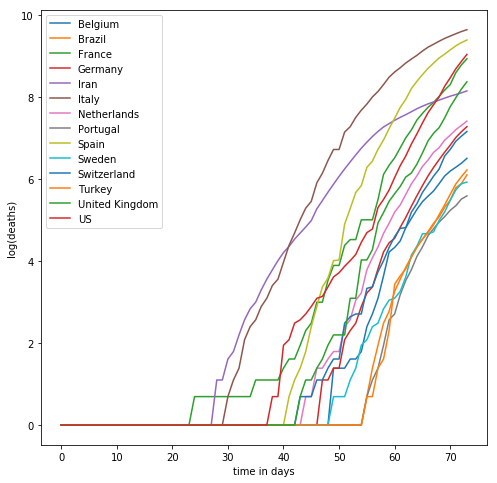

In [248]:
fig, ax = plt.subplots()
fig.set_size_inches(8,8)

for x in foyers.index:
    if df.iloc[x]["Country/Region"] in ['China']: continue
    Y = np.log( df.iloc[x].values[4:].astype(np.float) + 1)
    ax.plot(np.arange(len(Y)),Y, label=df.iloc[x]["Country/Region"])

#ax.axis('equal')
leg = ax.legend()
plt.xlabel('time in days')
plt.ylabel('log(deaths)')

so the graph shows log(deaths) 

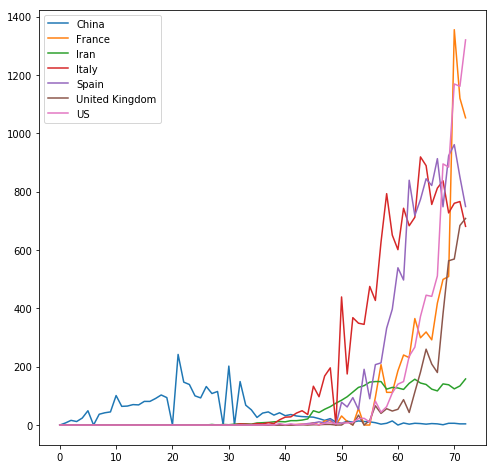

In [247]:
sss = df[df[df.columns[-1]] > 2000]
fig, ax = plt.subplots()
fig.set_size_inches(8,8)
for k in sss.index:
    x = df.iloc[k,4:].values
    x[1:] - x[:-1]
    ax.plot(x[1:] - x[:-1], label=df.iloc[k]["Country/Region"])
    
leg = ax.legend()



In [239]:
for k in [116,201,137]:
    x = df.iloc[k,4:].values
    u = x[1:] - x[:-1]
    print(df.iloc[k,1].ljust(10),u[-7:])

France     [292 418 499 509 1355 1120 1053]
Spain      [821 913 748 923 961 850 749]
Italy      [756 812 837 727 760 766 681]


# Compare Korea, Germany, Spain over the last 10 days

In [190]:
dfc.iloc[[143,120,201],-10:]

,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20
143,9037,9137,9241,9332,9478,9583,9661,9786,9887,9976
120,32986,37323,43938,50871,57695,62095,66885,71808,77872,84794
201,39885,49515,57786,65719,73235,80110,87956,95923,104118,112065


# Linear regression

If a quantity is growing/decaying exponentially 
then by taking logs we should get a straignt line....

We can calculate the best fit straight line 
to the data by doing linear regression.



In [168]:
from scipy import stats


def lin_reg(mdf, indices, window = 10):
    X = []
    for c in indices:
        Y = mdf.iloc[c].values[ -window:].astype(np.float)
        # apply a cut off
        Y = np.log(Y[Y > 100])
        vv = stats.linregress(np.arange(len(Y)), Y)
        X.append((c, np.exp(vv.slope), np.exp(vv.intercept).astype(int) ))
    return X

## these are the results

In [240]:
ww = 10
cc = countries = [x for x in foyers.index if x != 62]

X = list(zip(* lin_reg(df,cc,window=ww)))
Z = list(zip(* lin_reg(dfc,cc,window=ww)))

X[2] = Z[1]
X[0] = [dfc.iloc[x]["Country/Region"] for x in X[0]]
dff = pd.DataFrame({'country' : X[0], 'deaths': X[1], 'confirmed': X[2]})
dff

,country,deaths,confirmed
0,Belgium,1.221644,1.122172
1,Brazil,1.222654,1.151530
2,France,1.180746,1.117239
3,Germany,1.206081,1.087243
4,Iran,1.048433,1.073712
5,Italy,1.070644,1.047880
6,Netherlands,1.157830,1.090275
7,Portugal,1.145668,1.126067
8,Spain,1.117387,1.089844
9,Sweden,1.207282,1.099039


# Calculate days till herd immunity achieved

- The population is roughly $67 \times 10^6$.
- dfc holds the stats for confirmed cases
- dff holds the growth rates

So we need to do something like
$$\frac{1}{ \text{growth rate}} \times
\log \left( .6 \times \frac{\text{Population}}{\text{# infected total}} 
\right)
$$

When I think about it whether it's .6 or .4 makes hardly any difference
because we are taking logs and the difference is less than 1/2.

In [241]:
np.log( dff.iloc[2,2])   + np.log( dff.iloc[2,1]) ,  dfc.iloc[116, -1]

(0.27700685596742697, 89953)

In [147]:
#(np.log(.6)- np.log(.4)) /np.log( dff.iloc[2,2]) 

In [243]:
np.log(.6*67*10**6/ dfc.iloc[116, -1]) /.14,  dfc.iloc[116, -1]

(43.58810687788989, 89953)

Text(0,0.5,'confirmed cases growth rate')

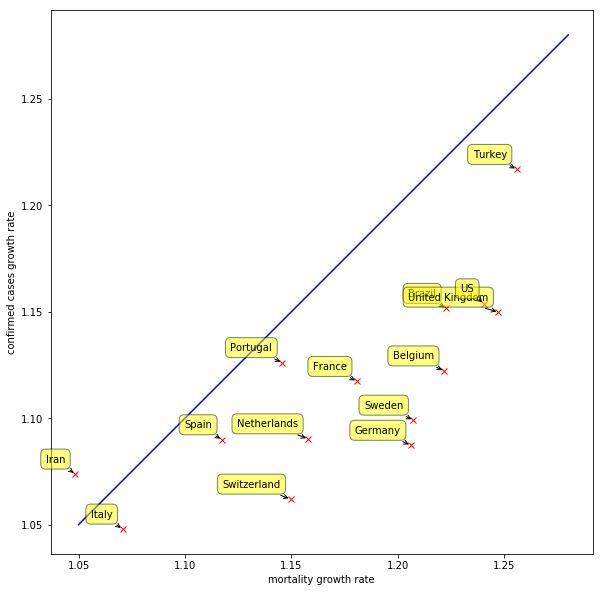

In [250]:
labels = dfc.iloc[cc]["Country/Region"]

fig, ax = plt.subplots()
fig.set_size_inches(10,10)
for label, x, y in zip(dff['country'], dff['deaths'],dff['confirmed']):
    ax.annotate(
        label,
        xy=(x, y), xytext=(-10, 10),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

ax.plot(dff['deaths'],dff['confirmed'],'rx')
ax.set_aspect('equal')
bx = [1.05,1.28]
plt.plot(bx,bx,'b')
plt.xlabel('mortality growth rate')
plt.ylabel('confirmed cases growth rate')

## Calculate rolling averages for some countries for the last 36 days


this was something somebody asked me to do for another problem
but it's a standard way of smoothing data.

In [71]:
df.iloc[cc,-1]

23       513
116     3024
120      645
133     2757
137    11591
169      864
201     7716
206      359
223     1408
225     2978
Name: 3/30/20, dtype: int64

In [85]:
start = -30
data = [df.iloc[nn , start:].rolling(4).sum() for nn in cc ]
filtered_data = [ x[x>100].values for x in data]

## should really pad the filtered_data so that it's for the same period

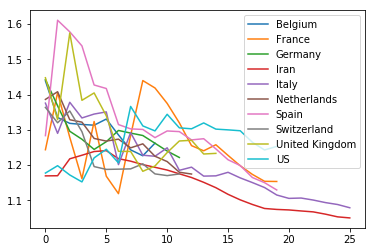

In [86]:
fig, ax = plt.subplots()
for x,label in zip(filtered_data, df.iloc[cc]["Country/Region"]):
    ax.plot( np.arange(len(x)-1), x[1:]/x[:-1], label=label)

leg = ax.legend();

# rolling sums for math

In [87]:
filtered_data[1]

array([  119.,   148.,   208.,   266.,   309.,   409.,   478.,   535.,
         687.,   989.,  1403.,  1929.,  2546.,  3196.,  3965.,  4987.,
        6122.,  7336.,  8611.,  9939., 11467.])

In [103]:
np.log(.6*67*10**6/52128)/np.log(1.11)

63.701792506762544

In [96]:
dfc.iloc[116,-1]

52128

In [152]:
np.exp(np.log(1250)/23)

1.3634783972515458

In [183]:
'Reidemeister'.lower()[:10]

'reidemeist'